# Redes neuronales convolucionales: paso a paso

Esta es la primera tarea del Curso 4. En esta tarea se implementan capas de convolución (CONV) y de pooling (POOL) en numpy, incluyendo tanto el fordward propagation como el backward propagation.

Al final de este cuaderno, serás capaz de:

* Explicar la operación de convolución.
* Aplicar dos tipos diferentes de operaciones de agrupamiento.
* Identificar los componentes utilizados en una red neuronal convolucional (padding, stride, filtro, ...) y su propósito.
* Construir una red neuronal convolucional.

::: {.callout-tip title="**Notación**" collapse="true"}
* El superíndice $[l]$ denota un objeto de la $l^{th}$ capa.

    - Ejemplo: $a^{[4]}$ es la activación de la cuarta capa. $W^{[5]}$ y $b^{[5]}$ son los parámetros de la quinta capa.

* El superíndice $(i)$ denota un objeto del $i^{th}$ ejemplo.

    - Ejemplo: $x^{(i)}$ es la entrada del $i^{th}$ ejemplo de entrenamiento.

* El subíndice $i$ denota la $i^{th}$ entrada de un vector.

    - Ejemplo: $a^{[l]}_i$ denota la $i^{th}$ entrada de las activaciones en la capa $l$, asumiendo que esta es una capa fully connected (FC).

* $n_H$, $n_W$ y $n_C$ denotan respectivamente la altura, anchura y número de canales de una capa dada. Si quieres referirte a una capa específica $l$, también puedes escribir $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$.

* $n_{H_{prev}}$, $n_{W_{prev}}$ y $n_{C_{prev}}$ denotan respectivamente la altura, anchura y número de canales de la capa anterior. Si se hace referencia a una capa específica $l$, esto también podría denotarse como $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$
:::

## Contenidos

- [1 - Librerías](#1)
- [2 - Convolutional Neural Networks](#2)
    - [2.1 - Zero-Padding](#2-1)


<a name='1'></a>
## 1 - Librerías

In [42]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>

## 2 - Convolutional Neural Networks

Una capa de convolución transforma un volumen de entrada en un volumen de salida de tamaño diferente, como se muestra a continuación:

<p align="center">
    <img src="images/conv_nn.png" style="width:350px;height:200px;">
</p>

En esta parte, se construirán todos los pasos de la capa de convolución. Se comenzará implementando dos funciones auxiliares:  una para el zero-padding y otra para calcular la función de convolución en sí.

<a name='2-1'></a>

### 2.1 - Zero-Padding

<p align="center">
  <img src="images/PAD.png" style="width:600px;height:400px;">
  <caption><center>
    <u> 
      <b style='color: purple;'>Figure 1:</b>
    </u> 
    <span style='color: purple;'><b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2.</span>
  </center></caption>
</p>

Los principales beneficios del padding son:

Permite utilizar una capa CONV sin reducir necesariamente la altura y el ancho de los volúmenes. Esto es importante para construir redes más profundas, ya que de lo contrario, la altura y el ancho disminuirían al avanzar hacia capas más profundas. Un caso especial importante es la convolución "same", en la que la altura y el ancho se preservan exactamente después de una capa.

Ayuda a conservar más información en el borde de una imagen. Sin relleno, muy pocos valores en la capa siguiente se verían afectados por los píxeles en los bordes de una imagen.

<a name='ex-1'></a>

### Ejercicio 1 - zero_pad
Se debe implementar la siguiente función, que añade zero-padding a todas las imágenes de un batch de ejemplos X. 

Por ejemplo, si se desea añadir un relleno de pad = 1 para la segunda dimensión, pad = 3 para la cuarta dimensión y pad = 0 para el resto a un array "a" de forma $(5,5,5,5,5)$, se haría de la siguiente manera:

```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))
```


In [43]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    
    X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)))
      
    return X_pad

Dimensiones del vector x: 	(4, 3, 3, 2)
Dimensiones del vector x_pad: 	(4, 3, 3, 2)

Contenido de x[1,1] =
 [[-0.34385368  0.04359686]
 [-0.62000084  0.69803203]
 [-0.44712856  1.2245077 ]]

Contenido de x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


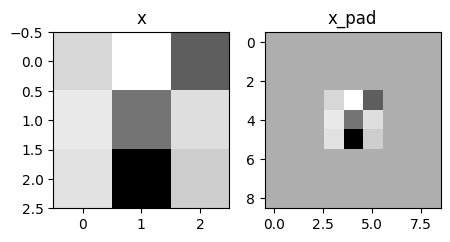

In [62]:
# genero vector de números aleatorios (4 matrices de 3x3 con 2 canales)
x = np.random.randn(4, 3, 3, 2)

# le añado el padding (El tamaño del relleno es 3, lo que significa que se añaden 3 filas/columnas de ceros alrededor de cada matriz)
x_pad = zero_pad(x, 3)

print (f"Dimensiones del vector x: \t{x.shape}")
print (f"Dimensiones del vector x_pad: \t{x.shape}")

print ("\nContenido de x[1,1] =\n", x[1, 1])
print ("\nContenido de x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
plt.show()

<a name='2-2'></a>

### 2.2 - Un solo paso de la convolución

En esta parte, se implementará un solo paso de la convolución, en el cual se aplciará el filtro a una única posición de la entrada. Esto se utilizará para construir una unidad convolucional, que:

- Toma un volumen de entrada
- Aplica un filtro en cada posición de la entrada
- Produce otro volumen (generalmente de tamaño diferente)

<p align="center">
  <img src="images/Convolution_schematic.gif" style="width:500px;height:300px;">
  <caption><center>
    <u> 
      <b style="color: purple;">Figura 2:</b>
    </u> 
    <span style='color: purple;'><b>Operación de convolución</b><br> Operación de convolución con un filtro de 3x3 y un paso de 1 (el paso es la cantidad que mueves la ventana cada vez que la deslizas)</span>
  </center></caption>
</p>

En una aplicación de computer vision, cada valor en la matriz de la izquierda corresponde a un solo valor de píxel. Se convoluciona un filtro de 3x3 con la imagen multiplicando sus valores elemento a elemento (element-wise) con la matriz original, luego sumándolos y añadiendo un sesgo (bias). En este primer paso, se implementa un solo paso de la convolución, correspondiente a aplicar un filtro a solo una de las posiciones para obtener una única salida de valor real.


<a name='ex-2'></a>

### Ejercicio 2 - conv_single_step
Implementa `conv_single_step()`.

In [64]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev,W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    b = np.squeeze(b)
    Z = Z + b
    
    return Z

In [65]:
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


<a name='2-3'></a>

### 2.3 - Convolutional Neural Networks - Forward Pass

En el forward pass, se convolucionan múltiples filtros sobre la entrada. Cada 'convolución' proporciona una salida en forma de matriz 2D. Estas salidas se apilan para obtener un volumen 3D:

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<a name='ex-3'></a>

### Exercise 3 -  conv_forward
Se implementará la función a continuación para convolucionar los filtros W sobre una activación de entrada A_prev.
Esta función toma los siguientes parámetros:

* `A_prev`, las activaciones producidas por la capa anterior (para un batc de $m$ entradas);
* Los pesos se denotan con `W`. El tamaño de la ventana del filtro es $f x f$ .
* El vector de sesgo es `b`, donde cada filtro tiene su propio sesgo (único).
También se tiene acceso al diccionario de hiperparámetros, que contiene el paso (stride) y el relleno (padding).

**Hint**: 
1. To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
Notice how this gives a 3D slice that has height 2, width 2, and depth 3.  Depth is the number of channels.  
This will be useful when you will define `a_slice_prev` below, using the `start/end` indexes you will define.

2. To define a_slice you will need to first define its corners `vert_start`, `vert_end`, `horiz_start` and `horiz_end`. This figure may be helpful for you to find out how each of the corners can be defined using h, w, f and s in the code below.

<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 3</b> </u><font color='purple'>  : <b>Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)</b> <br> This figure shows only a single channel.  </center></caption>


**Reminder**:
    
The formulas relating the output shape of the convolution to the input shape are:
    
$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$
    



For this exercise, don't worry about vectorization! Just implement everything with for-loops.